# Task 6.2 - Exploring Relationships
## Wine Reviews Dataset

In [1]:
# Import visualization libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# Define path

In [4]:
path = r'/Users/cassystunkel/Documents/Wine Analysis'

In [5]:
df = pd.read_csv(os.path.join(path, 'Data Sets', 'Prepared Data', 'wine_data_clean.csv'))

In [6]:
# Check shape of dataframe

In [8]:
df.shape

(150925, 7)

In [9]:
# Check headers

In [10]:
df.head()

,Unnamed: 0,country,points,price,province,variety,price_missing
0,0,US,96,235.0,California,Cabernet Sauvignon,False
1,1,Spain,96,110.0,Northern Spain,Tinta de Toro,False
2,2,US,96,90.0,California,Sauvignon Blanc,False
3,3,US,96,65.0,Oregon,Pinot Noir,False
4,4,France,95,66.0,Provence,Provence red blend,False


In [11]:
# Remove index column

In [12]:
df = df.drop(columns = ['Unnamed: 0'])

In [13]:
# Re-check headers

In [14]:
df.head()

,country,points,price,province,variety,price_missing
0,US,96,235.0,California,Cabernet Sauvignon,False
1,Spain,96,110.0,Northern Spain,Tinta de Toro,False
2,US,96,90.0,California,Sauvignon Blanc,False
3,US,96,65.0,Oregon,Pinot Noir,False
4,France,95,66.0,Provence,Provence red blend,False


In [15]:
# Remove 'price_missing' column for purpose of this task

In [16]:
sub = df.drop(columns = ['price_missing'])

In [17]:
# Check headers of new subset

In [18]:
sub.head()

,country,points,price,province,variety
0,US,96,235.0,California,Cabernet Sauvignon
1,Spain,96,110.0,Northern Spain,Tinta de Toro
2,US,96,90.0,California,Sauvignon Blanc
3,US,96,65.0,Oregon,Pinot Noir
4,France,95,66.0,Provence,Provence red blend


In [21]:
# Create subset using only number variables ('points' and 'price')

In [25]:
new_sub = sub.drop(columns = ['country', 'province', 'variety'])

In [23]:
# Check headers of new subset

In [26]:
new_sub.head()

,points,price
0,96,235.0
1,96,110.0
2,96,90.0
3,96,65.0
4,95,66.0


## 03. Create a correlation matrix heatmap (colored)

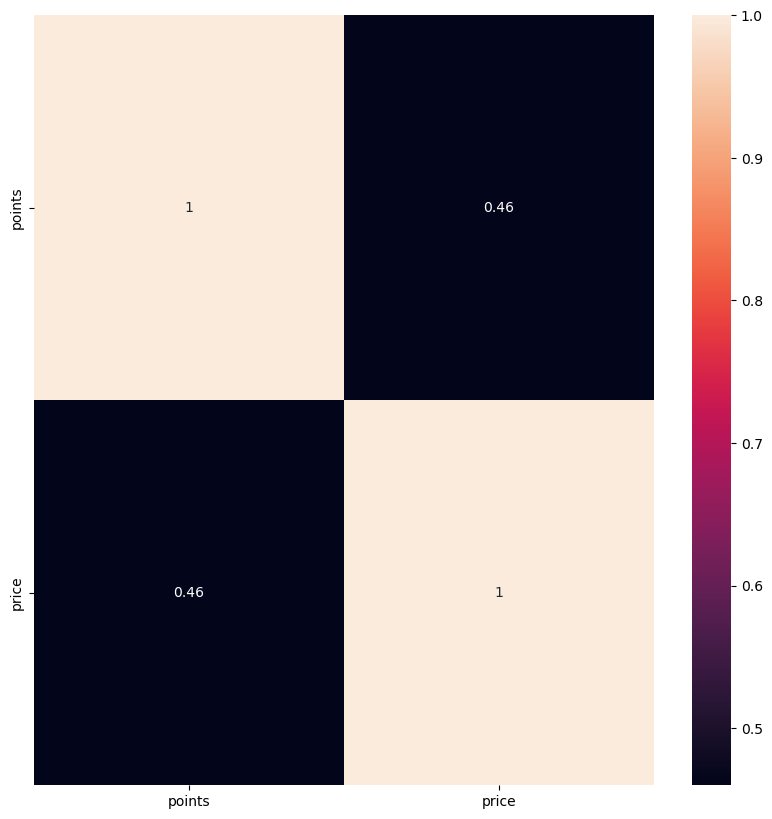

In [27]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(new_sub.corr(), annot = True, ax = ax)

### Measuring my two quantitative variables, I was able to identify a moderate positive relationship between 'price' and 'points' (rating).

## 04. Create a scatterplot for the variables and examine the nature of their relationships.

/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


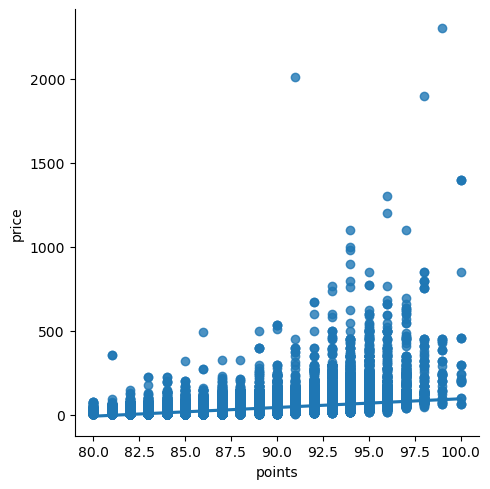

In [30]:
# Create a scatterplot for the 'price' and 'points' columns in seaborn

sns.lmplot(x = 'points', y = 'price', data = new_sub)

### The moderate positive relationship between 'points' and 'price' can be observed through the slight upward trend of the plots as we move from left to right on the graph. A few outliers are present, but I can generally state that wines that receive higher ratings may be priced higher.

## 05. Create a pair plot of the entire data set

/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/cassystunkel/anaconda3/l

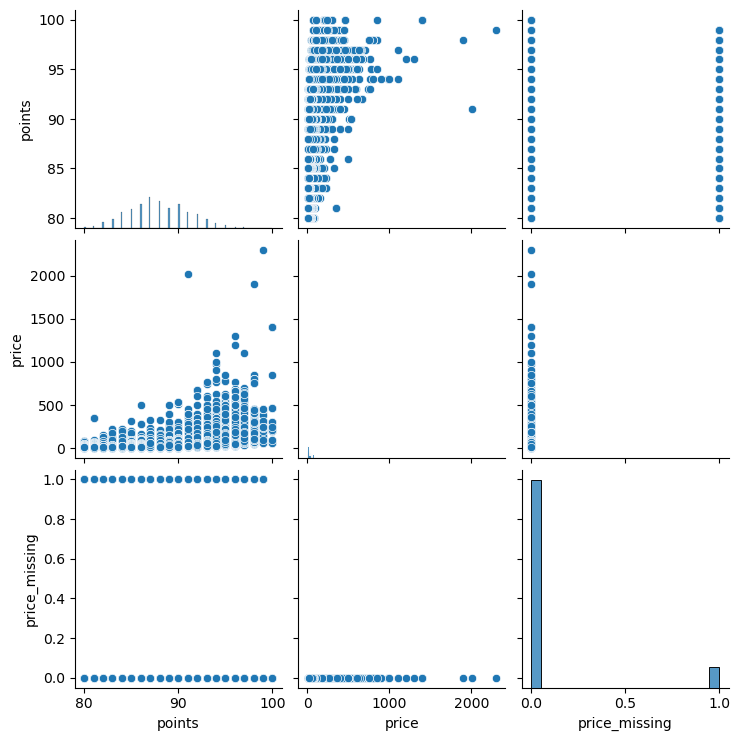

In [31]:
# Create a pair plot 

g = sns.pairplot(df)

### The moderate positive relationship between 'points' and 'price' is again visible within the various graphs. I will be exploring these two variables further as I continue to work through this project.

# 06. Create a categorical plot and interpret the results.

/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

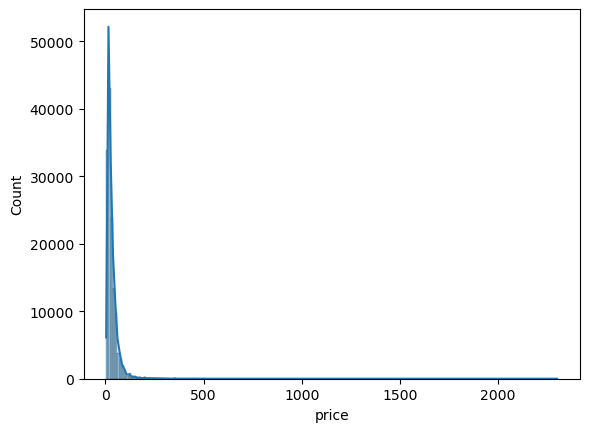

In [42]:
# Creating a historgram to visualize the distribution of 'price'

sns.histplot(df['price'], bins = 200, kde = True)

In [50]:
df.loc[df['price'] <= 20, 'Price category'] = 'Low price'

In [51]:
df.loc[(df['price'] > 20) & (df['price'] <= 75), 'Price category'] = 'Mid price'

In [52]:
df.loc[df['price'] > 75, 'Price category'] = 'High price'

In [53]:
# Check value counts of new 'Price category' column

df['Price category'].value_counts(dropna = False)

Price category
Mid price     70788
Low price     58811
nan           13695
High price     7631
Name: count, dtype: int64

/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


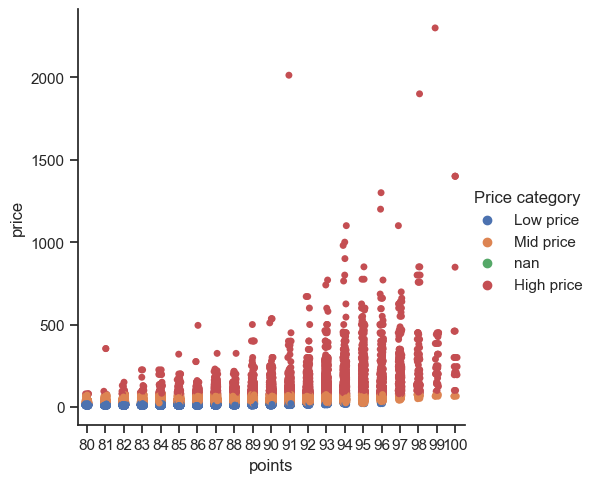

In [54]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style='ticks')
g = sns.catplot(x='points', y='price', hue="Price category", data=df)

In [59]:
# Finding the outliers in the 'price' column

# Calculate the first quartile and third quartile of the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers by filerting the dataframe
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Display the outliers
print(outliers)

          country  points  price            province  \
0              US      96  235.0          California   
1           Spain      96  110.0      Northern Spain   
2              US      96   90.0          California   
7           Spain      95  110.0      Northern Spain   
10          Italy      95   80.0  Northeastern Italy   
...           ...     ...    ...                 ...   
150565  Australia      93   90.0     South Australia   
150608     Canada      89   80.0             Ontario   
150722     Canada      84   83.0             Ontario   
150757         US      95  100.0          California   
150760      Chile      93   87.0         Puente Alto   

                         variety  price_missing Price category  
0             Cabernet Sauvignon          False     High price  
1                  Tinta de Toro          False     High price  
2                Sauvignon Blanc          False     High price  
7                  Tinta de Toro          False     High price  
10

In [60]:
# Create new dataframe with outliers removed

df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/cassystunkel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


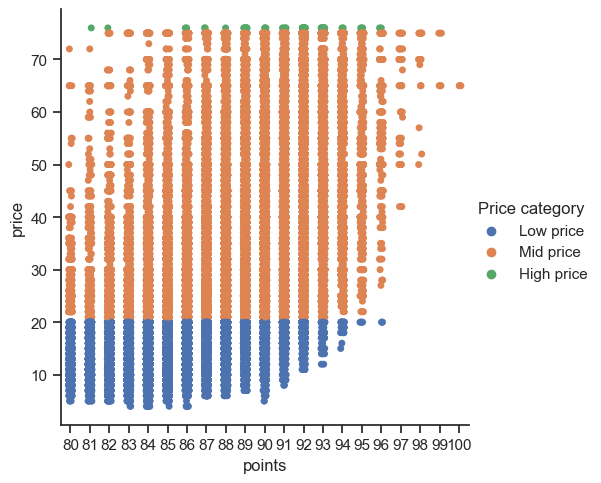

In [61]:
# Re-create categorical plot with new filtered dataframe

sns.set(style='ticks')
g = sns.catplot(x='points', y='price', hue='Price category', data=df_filtered)

### After removing my outliers, I can interpret the data a bit easier. I can see that there are not any 'Low price' wines with a score higher than 96. The majority of my data falls within the 'Mid price' range.

In [62]:
# Export dataset excluding outliers

df_filtered.to_csv(os.path.join(path, 'Data Sets', 'Prepared Data', 'wine_data_no_outliers.csv'))

# 07. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you've conducted so far.

### One question I can answer: Is there a relationship present between the price of wine and a high rating?

There is a moderately strong positive relationship between the price of wine and a high rating. An expensive wine does not necessarily reflect a high rating. Most low price wines will have a rating of 95 or less.

# 08. Define any hypotheses that you can at this point.

### Prive vs. Rating:
- Null Hypothesis: There is no significant difference in ratings between expensive and inexpensive wines.
- Alternative Hypothesis: Expensive wines have higher ratings compared to inexpensive wines.

### Variety vs. Price
- Null Hypothesis: There is no significant difference in the average price of different wine varieties.
- Alternative Hypothesis: Certain wine varieties are associated with higher prices compared to others.

### Differences in Ratings based on Location
- Null Hypothesis: There is no significant difference in wine ratings among different countries.
- Alternative Hypothesis: Wines from certain countries have higher ratings compared to others.